# Position of a star

You measure the position of a star $N$ times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$

## Part 1


- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian with the known $\sigma$ at each point. This is the probability of each data point, $p(x_i|\mu, \sigma)$.
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset ${x_i}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using np.argsort)
- Compare it with the MLE estimator derived above

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities\plot_settings.py')
from Utilities import plot_settings

In [2]:
from scipy.stats import norm

In [292]:
N = 500       # observed positions
mu = 1      # true value  
sigma = 0.2 # homoscedastic errors

In [293]:
observed = norm(mu, sigma).rvs(N)

Since the process is gaussian, the loglikelihood will be the following:

$ln(\mathcal{L}) = -\frac{N}{2}\ln(2\pi) - N\ln(\sigma) -\frac{1}{2\sigma^{2}}\sum_{i=1}^{N} (x_i - \mu)^{2}$

In [294]:
def loglikelihood(observed,mu,sigma):
    return -np.sum(np.log(np.sqrt(2*np.pi)*sigma)) - 0.5 * np.sum(((observed-mu)/sigma)**2)

In [295]:
mu_plot = np.linspace(0,2,1000)

In [296]:
pdf_xi = np.array([norm.pdf(mu_plot, loc=obs, scale=sigma) for obs in observed])

In [297]:
loglikes = []
for obs in observed:
    temp = [loglikelihood(mu,obs,sigma) for mu in mu_plot]
    loglikes.append(temp)

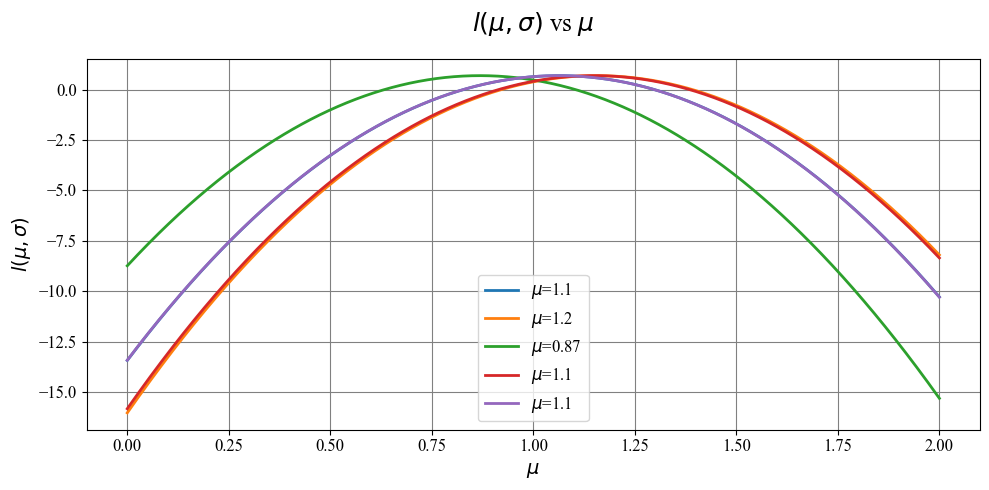

In [260]:
for i,obs in enumerate(observed):
    plt.plot(mu_plot, loglikes[i], linewidth=2,label=r'$\mu$'+f'={obs:.2}')
plt.title(r'$l(\mu,\sigma)$ vs $\mu$')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$l(\mu,\sigma)$')
plt.legend()

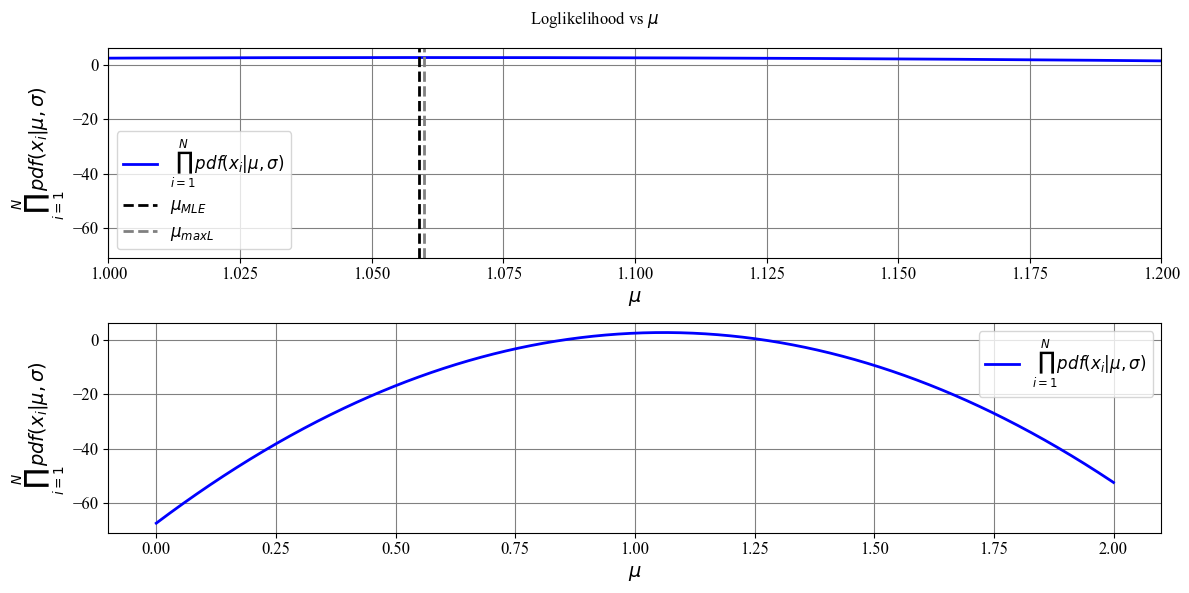

In [264]:
fig, axs = plt.subplots(2, 1, figsize=(12,6))
axs[0].plot(mu_plot, np.sum(loglikes, axis=0), linewidth=2,color='blue', label=r'$\prod_{i=1}^{N} pdf(x_i|\mu,\sigma)$')
axs[0].axvline(mu_plot[np.argmax(np.sum(loglikes, axis=0))], 0, 1, linestyle='--', color='black', label=r'$\mu_{MLE}$')
axs[0].axvline(observed.mean(), 0, 1, linestyle='--', color='grey', label=r'$\mu_{maxL}$')
fig.suptitle(r'Loglikelihood vs $\mu$')
axs[0].set_xlabel(r'$\mu$')
axs[0].set_ylabel(r'$\prod_{i=1}^{N} pdf(x_i|\mu,\sigma)$')
axs[0].set_xlim(1, 1.2)
axs[0].legend()

axs[1].plot(mu_plot, np.sum(loglikes, axis=0), linewidth=2,color='blue', label=r'$\prod_{i=1}^{N} pdf(x_i|\mu,\sigma)$')
axs[1].set_xlabel(r'$\mu$')
axs[1].set_ylabel(r'$\prod_{i=1}^{N} pdf(x_i|\mu,\sigma)$')
axs[1].legend()

In [298]:
print(f'mu values maximizing likelihood is {mu_plot[np.argmax(np.sum(loglikes, axis=0))]:.3}')

mu values maximizing likelihood is 1.01


In [299]:
print(f'MLE for mean is : {observed.mean():.3}')

MLE for mean is : 1.01


## Part 2
Check the Fisher matrix error estimate makes sense

- do a rough $2^{\text{nd}}$ order differentation of our log-likelihood function with np.diff,
- divide through by our $\Delta\theta^{2}$ to get the correct normalization,
- multiply by $-1$,
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

In [300]:
L = np.sum(loglikes, axis=0) # Total data loglikelihood

In [301]:
dmu = mu_plot[1]-mu_plot[0] # mu differential (denominator)
dL = np.diff(L, n=2)
mu_fisher_error = 1/np.sqrt((-1) * dL/(dmu**2))[np.argsort(mu_plot[np.argmax(np.sum(loglikes, axis=0))])]

In [302]:
print(f'Error on mu is : {mu_fisher_error[0]:.3}')
print(f'sigma/sqrt(N) : {sigma/np.sqrt(N):.3}')

Error on mu is : 0.00894
sigma/sqrt(N) : 0.00894


## Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic).\
Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean $\mu=0.1$ and standard deviation $\sigma = 0.05$
- Generalize your code from above to this case

In [303]:
sigmas = np.abs(np.random.normal(0.1,0.05,N))
realistic = np.array([norm(mu,sigma).rvs(1) for sigma in sigmas])

In [304]:
loglikes_real = []
for real,sigma in zip(realistic,sigmas):
    temp = [loglikelihood(mu,real,sigma) for mu in mu_plot]
    loglikes_real.append(temp)

In [305]:
L_real = np.sum(loglikes_real, axis=0) # Total data loglikelihood

In [333]:
dmu = mu_plot[1]-mu_plot[0] # mu differential (denominator)
dL_real = np.diff(L_real, n=2)
mu_fisher_error_real = 1/np.sqrt((-1) * dL_real/(dmu**2))[np.argmax(L_real)]

In [334]:
print(f'mu values maximizing likelihood is {mu_plot[np.argmax(L_real)]:.4}')

mu values maximizing likelihood is 1.001


In [335]:
MLest = np.average(realistic, weights=1/sigmas**2, axis=0)
print(f'MLE for mu is : {MLest[0]:.4}')

MLE for mu is : 1.0


In [336]:
print(f'Fisher Matrix Error on mean : {mu_fisher_error_real:.3}')
print(f'sqrt(sum 1/sigma^2) : {np.sum(sigmas**-2)**-0.5:.3}')

Fisher Matrix Error on mean : 0.000714
sqrt(sum 1/sigma^2) : 0.000714
